# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('VegetableMarket.csv')

In [3]:
df.head(7)

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [4]:
df.shape

(7, 2)

In [5]:
df.corr()

,weight,price
weight,1.000000,0.306795
price,0.306795,1.000000


Text(0.5, 1.0, 'Vegetable Market')

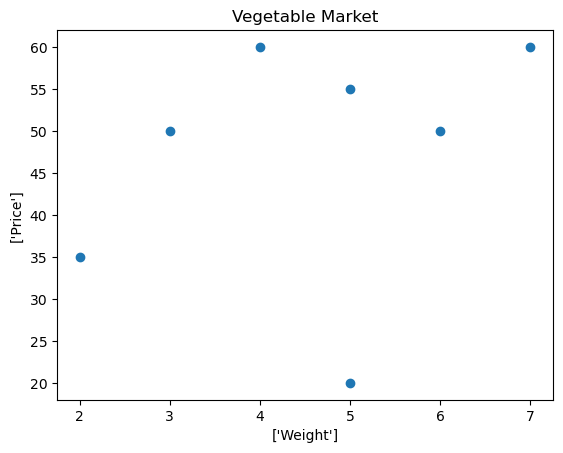

In [6]:
plt.scatter(df['weight'], df['price'])
plt.xlabel(['Weight'])
plt.ylabel(['Price'])
plt.title('Vegetable Market')

In [7]:
df.describe()

,weight,price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


<br>

# Manual Calculation
Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)

Intercept, c = ȳ - m * x̄

In [8]:
x = df['weight']
y = df['price']

In [9]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [10]:
mean_x

4.571428571428571

In [11]:
mean_y

47.142857142857146

In [12]:
dev_x = x - mean_x
dev_y = y - mean_y

In [13]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: weight, dtype: float64

In [14]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: price, dtype: float64

In [15]:
coefficient_m = np.sum(dev_x*dev_y) / np.sum(dev_x**2)
coefficient_m

2.620967741935484

In [16]:
intercept_c = mean_y - coefficient_m*mean_x
intercept_c

35.16129032258065

In [17]:
predictable_x = 6
predictable_y = (coefficient_m * predictable_x) + intercept_c
predictable_y

50.88709677419355

In [18]:
df.head(5)

,weight,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [19]:
predicted_value = (coefficient_m * x) + intercept_c

In [20]:
predicted_value

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: weight, dtype: float64

In [21]:
residual_ = y - predicted_value

In [22]:
residual_

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [23]:
mse_ = 1/7 * np.sum(residual_**2)
mse_

167.30990783410135

In [24]:
import math
rmse_ = math.sqrt(mse_)
rmse_

12.934833119685052

In [25]:
mae_ = 1/7 * np.sum(np.absolute(residual_))
mae_

9.873271889400918

<br>

<br>

# SKLEARN

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(df[['weight']], df[['price']])

LinearRegression()

In [29]:
reg.coef_

array([[2.62096774]])

In [30]:
coefficient_m

2.620967741935484

In [31]:
reg.intercept_

array([35.16129032])

In [32]:
intercept_c

35.16129032258065

In [33]:
reg.predict([[6]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [34]:
predictable_y

50.88709677419355

In [35]:
predicted_price = reg.predict(df[['weight']])
predicted_price

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [36]:
df['predicted_price'] = reg.predict(df[['weight']])
df.head(7)

,weight,price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'Price vs. Weight')

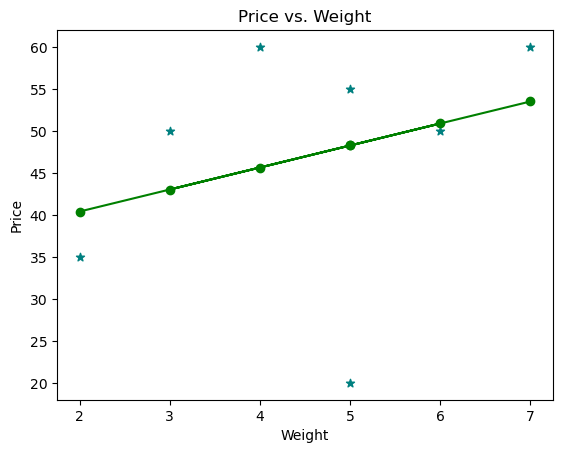

In [37]:
plt.plot(df[['weight']], df[['predicted_price']], marker = 'o', color = 'green')
plt.scatter(df['weight'], df['price'], marker = '*', color = 'teal')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price vs. Weight')

In [38]:
residual = df['price'] - df['predicted_price']

In [39]:
residual

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [40]:
residual_

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [42]:
mse = mean_squared_error(df['price'], df['predicted_price'])
mse

167.30990783410135

In [43]:
mse_

167.30990783410135

In [44]:
import math
rmse = math.sqrt(mse)
rmse

12.934833119685052

In [45]:
rmse_

12.934833119685052

In [46]:
mae = mean_absolute_error(df['price'], df['predicted_price'])
mae

9.87327188940092

In [47]:
mae_

9.873271889400918